In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
veri1= pd.read_csv('2020.csv')
veri2=pd.read_csv('2021.csv')

In [3]:
frames = [veri1,veri2]
veri = pd.concat(frames)
veri = veri[['Ladder score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption','Dystopia + residual']]

In [4]:
y=np.array(veri['Ladder score'])
X=np.array(veri.drop('Ladder score',axis=1))

In [5]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [6]:
linear = LinearRegression()

In [7]:
linear.fit(X_train,y_train)

LinearRegression()

In [8]:
linear.score(X_test,y_test)

0.9581787003506408

In [9]:
linear.score(X_train,y_train)

0.9568213167204402

In [10]:
print('Katsayılar:\n',linear.coef_)
print('Sabit:\n',linear.intercept_)

Katsayılar:
 [ 0.30048737  2.3880142   0.03460259  1.37889757  0.6422361  -0.64047454
  0.83901927]
Sabit:
 -3.9287132536761895


In [11]:
y_pred = linear.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,5.0051,4.775357
1,3.6150,3.890230
2,5.1598,5.012430
3,6.3771,6.339682
4,3.6000,3.920084
...,...,...
56,6.6900,6.886307
57,5.1191,5.073095
58,7.2770,7.476621
59,5.8130,6.003880


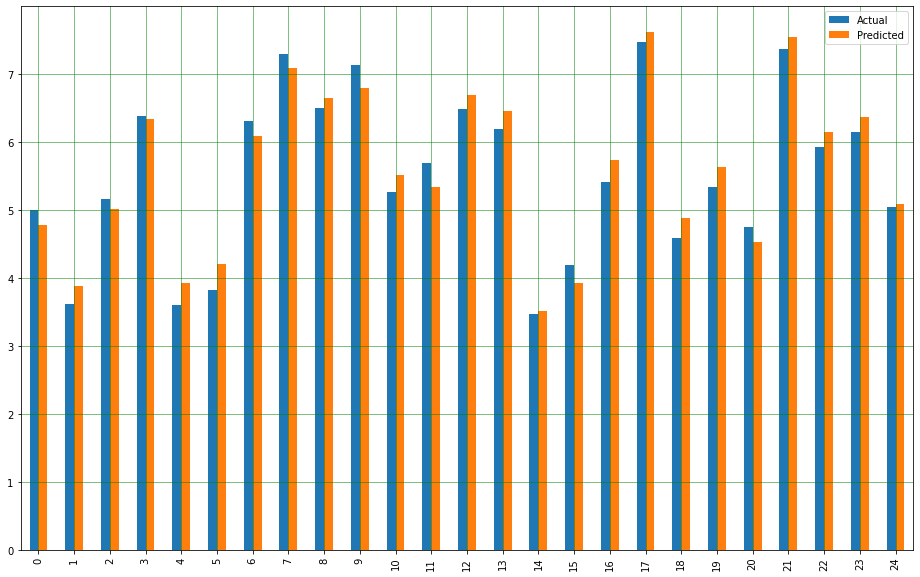

In [12]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

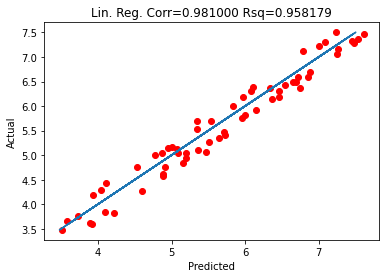

In [18]:
from sklearn.metrics import r2_score
linear = LinearRegression()
linear.fit(X_train, y_train)
preds_linear = linear.predict(X_test)
corr_linear = round(pd.Series(preds_linear).corr(
pd.Series(y_test)), 3)
rsquared_linear = r2_score(y_test, preds_linear)
plt.scatter(preds_linear, y_test,color= 'red')
plt.title("Lin. Reg. Corr=%f Rsq=%f"
% (corr_linear, rsquared_linear))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.plot(y_test, y_test)
plt.show()

In [14]:
#2021 için ladder score=4.948 değişkenler=(10.240,0.822,67.199,0.576,-0.139,0.776,1.852)
#2022 için tahmin
yeni_ulke = np.array([[10.240,0.822,70.000,0.600,-0.139,0.500,1.852]])
linear.predict(yeni_ulke)

array([5.5051008])

In [15]:
from sklearn import metrics
ypred_train = linear.predict(X_train)
y_pred_test=preds_linear
print("Accuracy of training data:", metrics.r2_score(y_train, ypred_train)*100)
ac1 = metrics.r2_score(y_test, y_pred_test)*100
print("Accuracy of testing data:", ac1)

Accuracy of training data: 95.68213167204402
Accuracy of testing data: 95.81787003506408


In [16]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Mean Absolute Error: 0.2135540001967705
Mean Squared Error: 0.053424487964236184
Root Mean Squared Error: 0.23113737898539083
